How does the attack stat of Leafeon compare to that of other fourth generation pokemon?

I plan to research online to find a histogram of strength stats for gen 4 of pokemon,
I will examine the whole population.

My data comes from the pokemon database, it was collected by many dataminers and community contributors among others. They took all pokemon from gen 4. My dataset came originally from a database made by a smaller community documenting pokemon that eventually grew with more community effort, this data has no reason to contain any biases, so long as the data was properly collected, which it seems to have been given that it contains both the start of the gen four pokedex turtwig, and the end of the gen 4 pokedex Arceus.

Mean Attack stat: 79.13
Median Attack stat: 79.50
Mode Attack stat: 65
Standard Deviation of Attack: 30.62
Variance of Attack: 937.31

Five-number summary:
Minimum: 5
Q1 (25th percentile): 60.0
Median: 79.5
Q3 (75th percentile): 100.0
Maximum: 165

Leafeon's Attack stat: 110


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


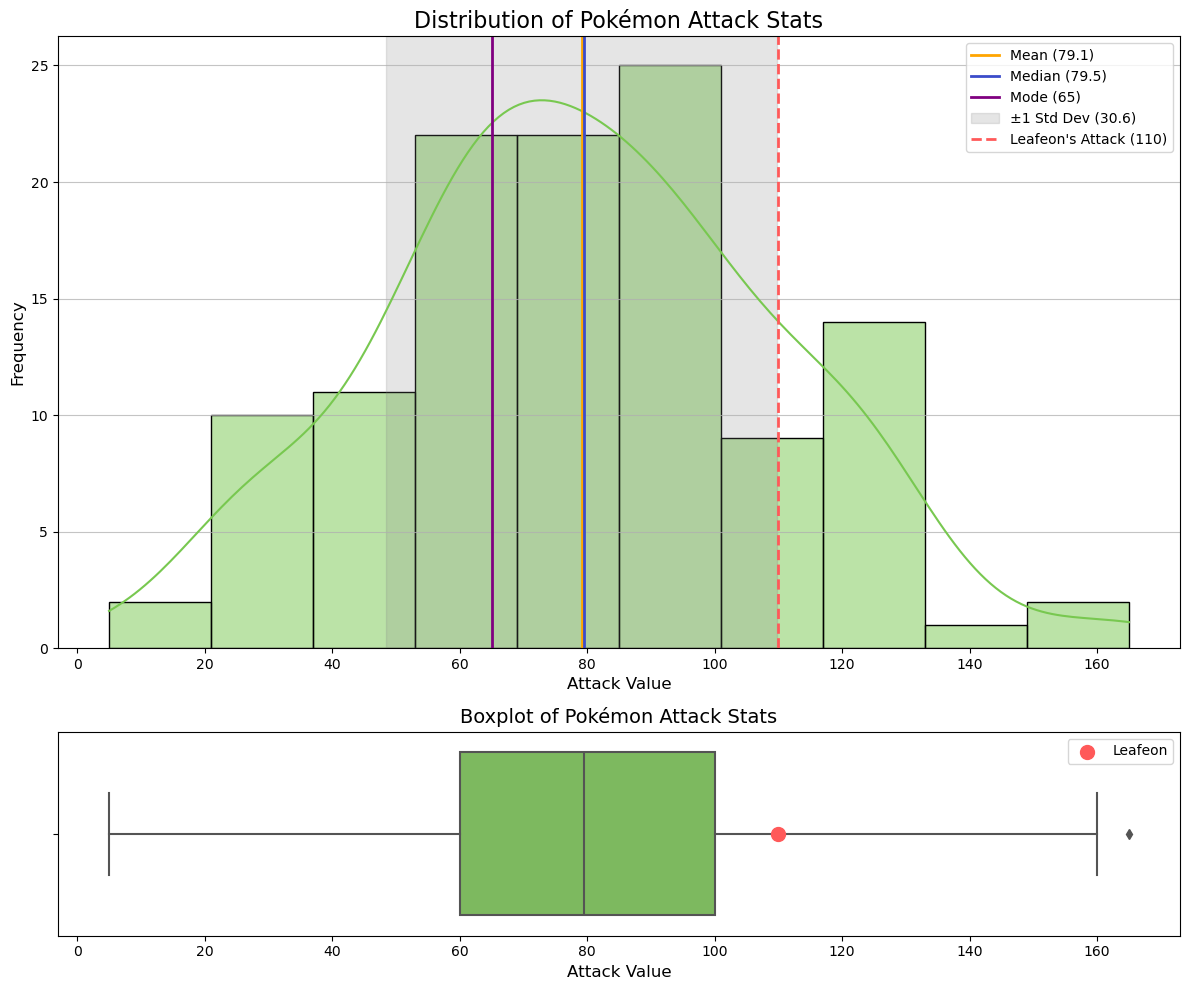

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ANSI color codes
BLACK = "\033[30m"
RESET = "\033[0m"

# Load your Pokémon dataset
try:
    df = pd.read_csv('G4 Attack.csv')
    
    # Basic statistics
    mean_attack = df['Attack'].mean()
    median_attack = df['Attack'].median()
    mode_attack = df['Attack'].mode()[0]
    std_attack = df['Attack'].std()
    var_attack = df['Attack'].var()
    
    print(f"{BLACK}Mean Attack stat: {mean_attack:.2f}{RESET}")
    print(f"{BLACK}Median Attack stat: {median_attack:.2f}{RESET}")
    print(f"{BLACK}Mode Attack stat: {mode_attack}{RESET}")
    print(f"{BLACK}Standard Deviation of Attack: {std_attack:.2f}{RESET}")
    print(f"{BLACK}Variance of Attack: {var_attack:.2f}{RESET}")
    
    # Five-number summary
    min_attack = df['Attack'].min()
    q1_attack = df['Attack'].quantile(0.25)
    q3_attack = df['Attack'].quantile(0.75)
    max_attack = df['Attack'].max()
    
    print(f"\n{BLACK}Five-number summary:{RESET}")
    print(f"{BLACK}Minimum: {min_attack}{RESET}")
    print(f"{BLACK}Q1 (25th percentile): {q1_attack}{RESET}")
    print(f"{BLACK}Median: {median_attack}{RESET}")
    print(f"{BLACK}Q3 (75th percentile): {q3_attack}{RESET}")
    print(f"{BLACK}Maximum: {max_attack}{RESET}")
    
    # Try to find Leafeon's attack value
    try:
        leafeon_attack = df.loc[df['Name'] == 'Leafeon', 'Attack'].values[0]
        leafeon_exists = True
        print(f"\n{BLACK}Leafeon's Attack stat: {leafeon_attack}{RESET}")
    except (IndexError, KeyError):
        print(f"{BLACK}Couldn't find Leafeon in the dataset.{RESET}")
        leafeon_exists = False
        
    # Create figure with 2 subplots: histogram + boxplot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios':[3,1]})
    
    # --- Histogram ---
    sns.histplot(df['Attack'], kde=True, color='#78C850', ax=ax1)
    
    # Add vertical lines for statistics
    ax1.axvline(x=mean_attack, color='orange', linestyle='-', linewidth=2, 
                label=f"Mean ({mean_attack:.1f})")
    ax1.axvline(x=median_attack, color='#3B4CCA', linestyle='-', linewidth=2, 
                label=f"Median ({median_attack:.1f})")
    ax1.axvline(x=mode_attack, color='purple', linestyle='-', linewidth=2, 
                label=f"Mode ({mode_attack})")
    
    # Annotate spread (std dev shading)
    ax1.axvspan(mean_attack - std_attack, mean_attack + std_attack, 
                color='gray', alpha=0.2, label=f"±1 Std Dev ({std_attack:.1f})")
    
    # Leafeon marker
    if leafeon_exists:
        ax1.axvline(x=leafeon_attack, color='#FF5959', linestyle='--', linewidth=2, 
                    label=f"Leafeon's Attack ({leafeon_attack})")
    
    ax1.set_title('Distribution of Pokémon Attack Stats', fontsize=16)
    ax1.set_xlabel('Attack Value', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.grid(axis='y', alpha=0.75)
    ax1.legend()
    
    # --- Boxplot ---
    sns.boxplot(x=df['Attack'], ax=ax2, color='#78C850')
    
    # Mark Leafeon’s value with a red dot
    if leafeon_exists:
        ax2.scatter(leafeon_attack, 0, color='#FF5959', s=100, zorder=5, label="Leafeon")
        ax2.legend()
    
    ax2.set_title('Boxplot of Pokémon Attack Stats', fontsize=14)
    ax2.set_xlabel('Attack Value', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
except FileNotFoundError:
    print(f"{BLACK}File not found. Please check the file path.{RESET}")
except KeyError as e:
    print(f"{BLACK}Column not found: {e}. Your dataset might use different column names.{RESET}")


Leafeon's Attack stat: 110
Percentile rank: 84.32%
Z-score: 1.01


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


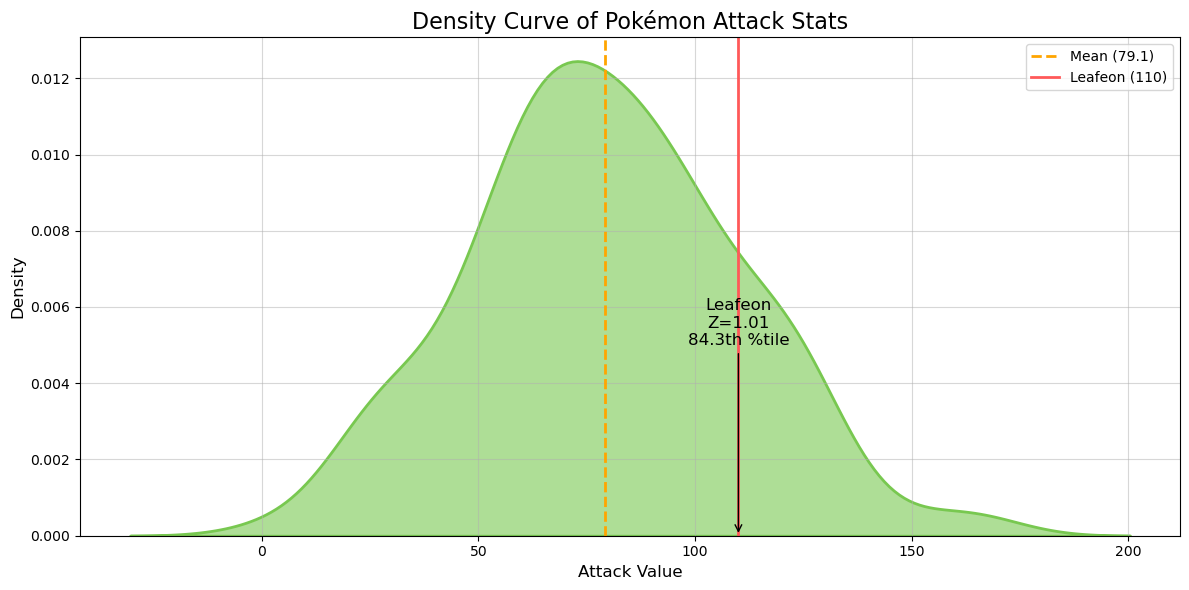

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# ANSI codes for black text
BLACK = "\033[30m"
RESET = "\033[0m"

# Load dataset
try:
    df = pd.read_csv("G4 Attack.csv")
    
    # Stats
    mean_attack = df['Attack'].mean()
    std_attack = df['Attack'].std()
    
    # Pick a Pokémon (example: Leafeon)
    try:
        poke_name = "Leafeon"
        poke_attack = df.loc[df['Name'] == poke_name, 'Attack'].values[0]
        poke_exists = True
    except (IndexError, KeyError):
        poke_name = None
        poke_exists = False
    
    # Calculate percentile and z-score
    if poke_exists:
        percentile = stats.percentileofscore(df['Attack'], poke_attack)
        z_score = (poke_attack - mean_attack) / std_attack
        
        print(f"{BLACK}{poke_name}'s Attack stat: {poke_attack}{RESET}")
        print(f"{BLACK}Percentile rank: {percentile:.2f}%{RESET}")
        print(f"{BLACK}Z-score: {z_score:.2f}{RESET}")
    
    # --- Density Curve ---
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df['Attack'], fill=True, color='#78C850', alpha=0.6, linewidth=2)
    
    # Mark mean
    plt.axvline(mean_attack, color='orange', linestyle='--', linewidth=2, label=f"Mean ({mean_attack:.1f})")
    
    # Mark Pokémon’s attack
    if poke_exists:
        plt.axvline(poke_attack, color='#FF5959', linestyle='-', linewidth=2, 
                    label=f"{poke_name} ({poke_attack})")
        plt.annotate(f"{poke_name}\nZ={z_score:.2f}\n{percentile:.1f}th %tile", 
                     xy=(poke_attack, 0), 
                     xytext=(poke_attack, 0.005), 
                     arrowprops=dict(facecolor='#FF5959', arrowstyle="->"),
                     fontsize=12, ha='center')
    
    # Labels
    plt.title("Density Curve of Pokémon Attack Stats", fontsize=16)
    plt.xlabel("Attack Value", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"{BLACK}File not found. Please check the file path.{RESET}")
except KeyError as e:
    print(f"{BLACK}Column not found: {e}. Your dataset might use different column names.{RESET}")


Leafeon's attack stat is in the 84.3rd percentile and has a z-score of 1.01, meaning it is about one standard deviation above the mean. This leaf fox monster has a greater attack stat that 84% of all other pokemon in its generation.